# A Rod-Pendulum System

**Project deadline:** This project is due for submission on Thursday, 26.06.2025, 23:55. Please check carefully the *About the Projects* section below for further details.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We hand-out four projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Thursday 26th of June, 23:55. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Matthias and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

## This project

We consider the following system of a rod and two pendulums:

<center><img src="figs/rod-pendulum.png" width=400 /><center/>

The massless rod of length $2L$ can rotate freely around the origin and is assumed to be massless. The system has two mounts (point masses $m_1$ and $m_2$) at the ends of the rod to which two pendulums are connected. The pendulums (lengths $l_1$ and $l_2$) can rotate freely around the mounts. The pendulums consist of two point masses $m_3$ and $m_4$ but are massless otherwise. The only external force on the system is gravitation and the systems movement all take place in the two-dimensional $x-y$ plane.

To simplify things, we set all the four masses equal, i.e. $m = m_1 = m_2 = m_3 = m_4$ and also $l = l_1 = l_2$ with $l < L$.

## Your tasks

1. Identify generalised coordinates of the system. Write down your choice in a markdown cell.
2. Use SymPy to analytically construct the Lagragian and the equations of motion for the system.
3. Use SciPy to numerically solve the equations of motions for different initial conditions (at least 4). Use conditions that show a linear, predictable evolution of the system but also chaotic behaviour. Consider a timeline of around 50 seconds.
4. We want to test whether our numeric solution is reasonable. To this end, consider and discuss the time evolution of the total energy of the system. What is your expectation and does the numeric solution behave as it should? Please investigate longer simulation times for this task.
5. Plot and discuss the time evolution of the energies from rod (masses $m_1$, $m_2$) and the pendulums (masses $m_3$, $m_4$). 
6. Create animations showing the movements of the system.

**Remarks:** (1) In the lecture I concentrated on demonstrating SymPy and how to use it. However, from the point-of-view of *code compactness* and *code reusabilty* the notebook is not good. I basically just continuously repeated and duplicated code for the two masses and for the two generalised coordinates. This becomes cumbersome and error-prone if more masses/coordinates are involved and quickly unmaintainable if you decide to modify the system, add new masses etc. Hence, please structure your project code and data in a better way from the very beginning; (2) In the SciPy lecture, I mentioned that, besides `odeint`, there is a second numeric solver `solve_ivp` within `scipy.integrate`. One possibility to earn bonus points is to compare and to discuss solutions of both solvers.

## Task 1: Generalized Coordinates
The system consists of a massless rod of length $2L$ pivoted at the origin with masses $m_1$ and $m_2$ at its ends and two pendulums of length $l$ attached to $m_1$ and $m_2$ with masses $m_3$ and $m_4$. The system has three degrees of freedom due to the rotation of the rod and the two pendulums. The generalized coordinates are:

$\theta$: The angle the rod makes with the positive $x$-axis, measured counterclockwise. It defines the rod’s orientation, fixing the positions of $m_1$ and $m_2$ at $(-L \cos \theta, -L \sin \theta)$ and $(L \cos \theta, L \sin \theta)$, respectively.

$\phi_1$: The angle of the pendulum attached to $m_1$ (mass $m_3$) relative to the downward vertical (negative $y$-axis). It is measured counterclockwise.

$\phi_2$: The angle of the pendulum attached to $m_2$ (mass $m_4$) relative to the downward vertical, and measured counterclockwise.

$\phi_1$ and $\phi_2$ determine the positions of $m_3$ and $m_4$ relative to $m_1$ and $m_2$.

## Task 2: Lagrangian and equations of motion

In [14]:
import sympy as sp
from IPython.display import display, Math

#defining symbolic variables
t = sp.symbols('t')
m, L, l, g = sp.symbols('m L l g', positive=True)
theta = sp.Function('theta')(t)
phi1 = sp.Function('phi1')(t)
phi2 = sp.Function('phi2')(t)
dtheta = sp.diff(theta, t)
dphi1 = sp.diff(phi1, t)
dphi2 = sp.diff(phi2, t)

#positions
r1 = (-L * sp.cos(theta), -L * sp.sin(theta))  #m1
r2 = (L * sp.cos(theta), L * sp.sin(theta))    #m2
r3 = (r1[0] + l * sp.sin(phi1), r1[1] - l * sp.cos(phi1))  #m3
r4 = (r2[0] + l * sp.sin(phi2), r2[1] - l * sp.cos(phi2))  #m4

#Velocities
v1 = (sp.diff(r1[0], t), sp.diff(r1[1], t))
v2 = (sp.diff(r2[0], t), sp.diff(r2[1], t))
v3 = (sp.diff(r3[0], t), sp.diff(r3[1], t))
v4 = (sp.diff(r4[0], t), sp.diff(r4[1], t))

# kinetic Energy
T = (1/2) * m * sum(vx**2 + vy**2 for vx, vy in [v1, v2, v3, v4])
T = T.simplify()

# Potential Energy (y upward, gravity downward)
V = -m * g * (r1[1] + r2[1] + r3[1] + r4[1])
V = V.simplify()

#Lagrangian
Lagrangian = T - V
display(Math(r"\text{Lagrangian: } " + sp.latex(Lagrangian)))

#Euler-Lagrange equations
def euler_lagrange(L, q, t):
    dq = sp.diff(q, t)
    dL_ddq = sp.diff(L, dq)
    d_dt_dL_ddq = sp.diff(dL_ddq, t)
    dL_dq = sp.diff(L, q)
    return sp.simplify(d_dt_dL_ddq - dL_dq)

eq_theta = euler_lagrange(Lagrangian, theta, t)
eq_phi1 = euler_lagrange(Lagrangian, phi1, t)
eq_phi2 = euler_lagrange(Lagrangian, phi2, t)

#displaying equations
display(Math(r"\text{Equation for } \theta: \quad " + sp.latex(eq_theta)))
display(Math(r"\text{Equation for } \phi_1: \quad " + sp.latex(eq_phi1)))
display(Math(r"\text{Equation for } \phi_2: \quad " + sp.latex(eq_phi2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Task 3: Numerical solution

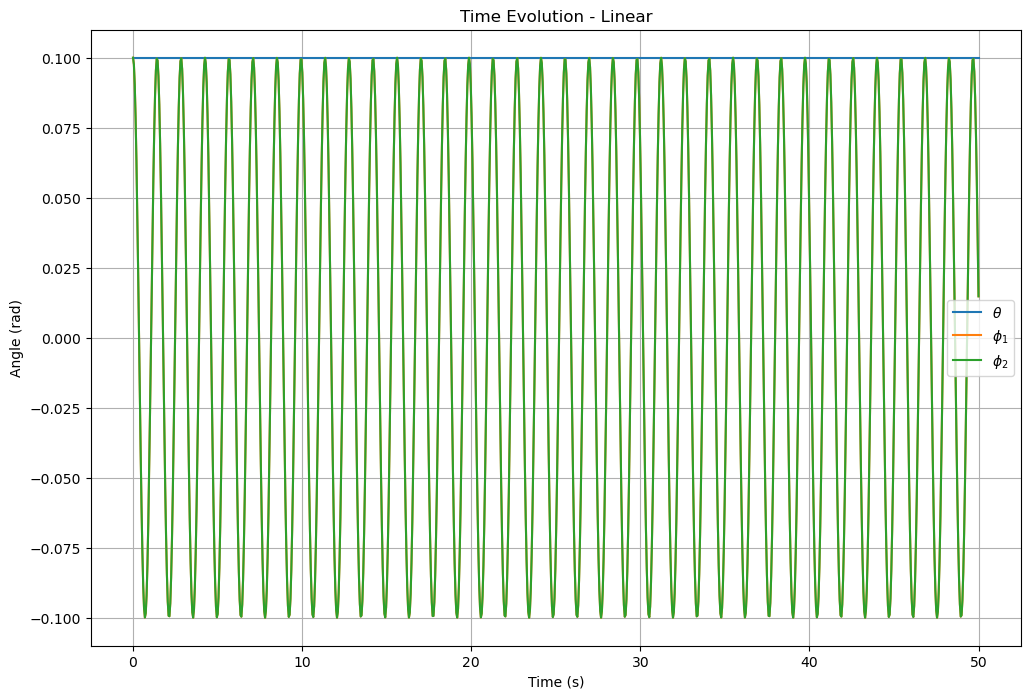

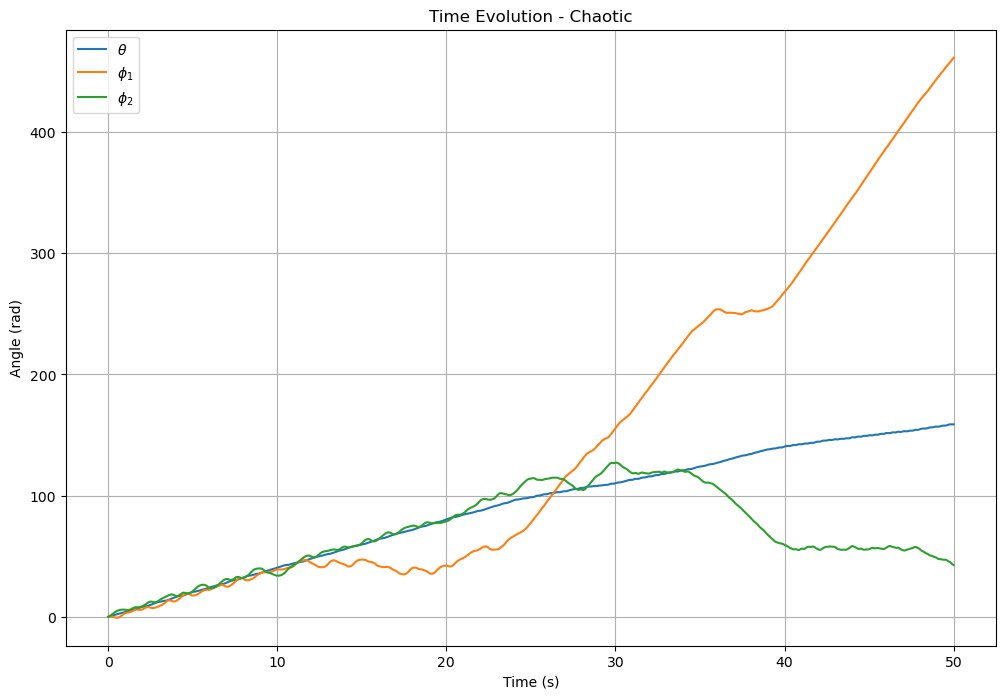

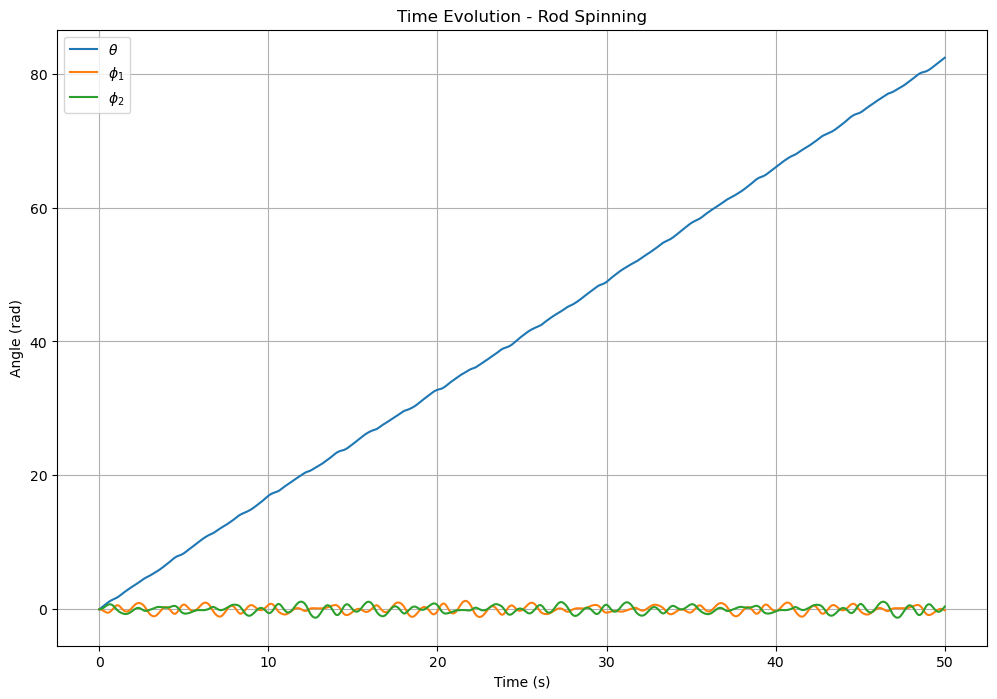

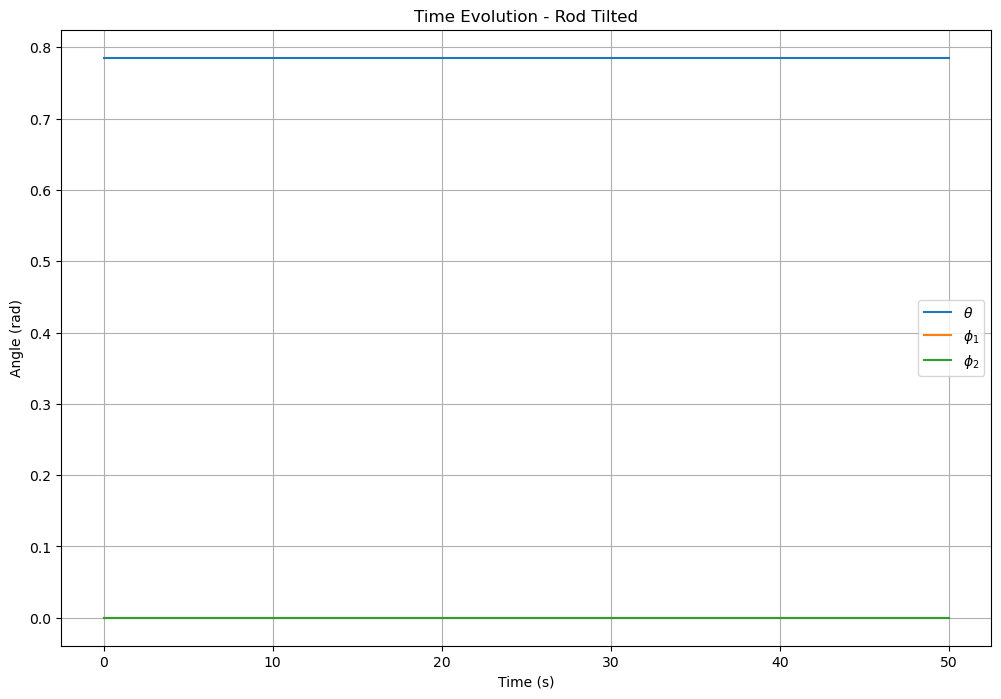

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#constants
m = 1.0
L = 1.0
l = 0.5
g = 9.81

#RHS function
def rhs(y, t, L, l, g):
    theta, phi1, phi2, dtheta, dphi1, dphi2 = y
    s1 = np.sin(phi1 - theta)
    s2 = np.sin(phi2 - theta)
    c1 = np.cos(phi1 - theta)
    c2 = np.cos(phi2 - theta)
    M = np.array([[4*L, -l*s1, l*s2],
                  [-L*s1, l, 0],
                  [L*s2, 0, l]])
    b = np.array([l*c1*dphi1**2 - l*c2*dphi2**2,
                  -L*c1*dtheta**2 - g*np.sin(phi1),
                  L*c2*dtheta**2 - g*np.sin(phi2)])
    ddtheta, ddphi1, ddphi2 = np.linalg.solve(M, b)
    return [dtheta, dphi1, dphi2, ddtheta, ddphi1, ddphi2]

#initial conditions
initial_conditions = [
    [0.1, 0.1, 0.1, 0, 0, 0],  # Linear
    [0.1, 0.1, 0.1, 5, 5, 5],  # Chaotic
    [0, 0, 0, 2, 0, 0],        # Rod Spinning
    [np.pi/4, 0, 0, 0, 0, 0]   # Rod Tilted
]
labels = ["Linear", "Chaotic", "Rod Spinning", "Rod Tilted"]

#Time array
t = np.linspace(0, 50, 1000)

# solving ODE
solutions = [odeint(rhs, y0, t, args=(L, l, g)) for y0 in initial_conditions]

#ploting results
for i, sol in enumerate(solutions):
    plt.figure(figsize=(12, 8))
    plt.plot(t, sol[:, 0], label=r'$\theta$')
    plt.plot(t, sol[:, 1], label=r'$\phi_1$')
    plt.plot(t, sol[:, 2], label=r'$\phi_2$')
    plt.title(f'Time Evolution - {labels[i]}')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Task 4: Total Energy Time Evolution

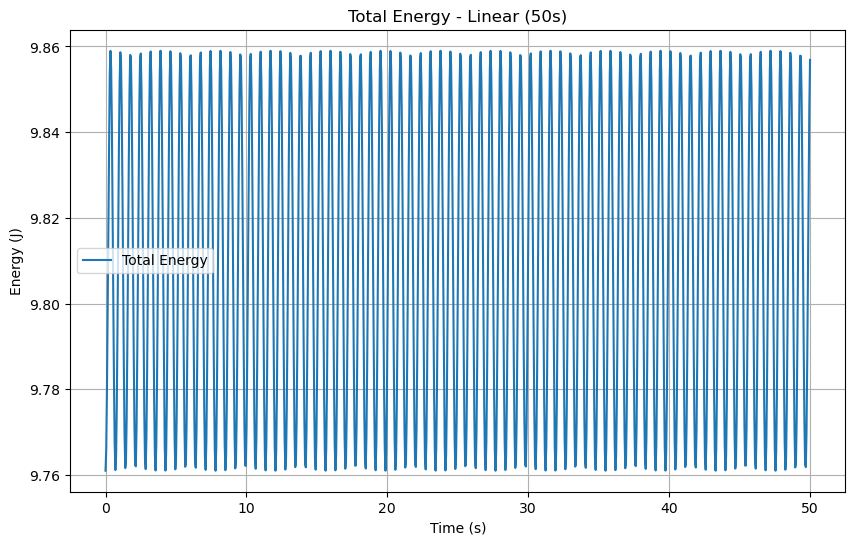

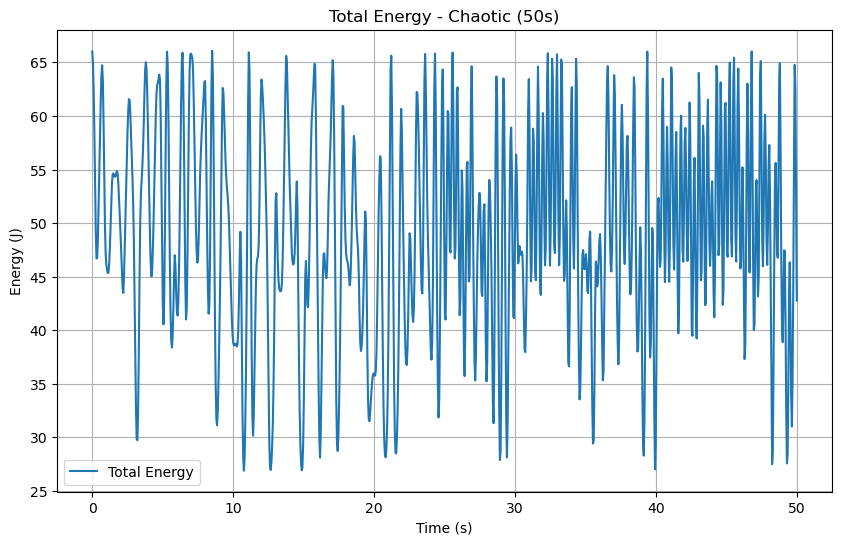

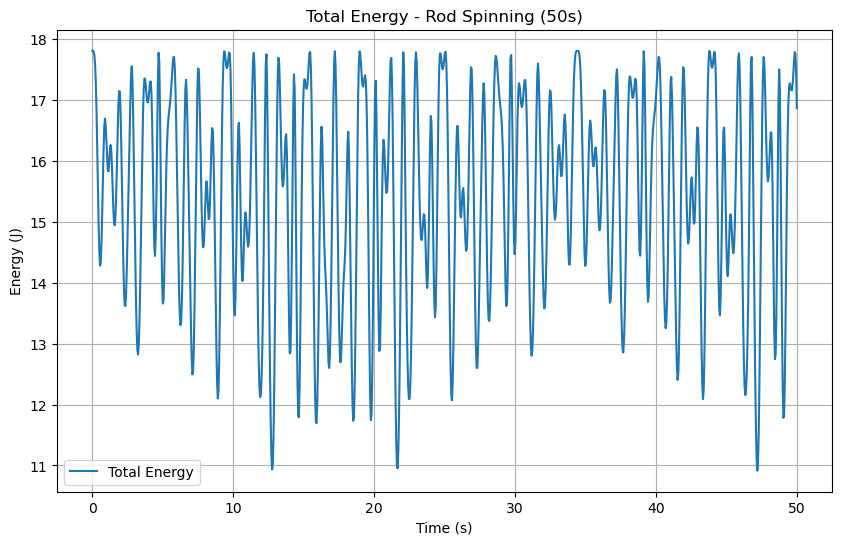

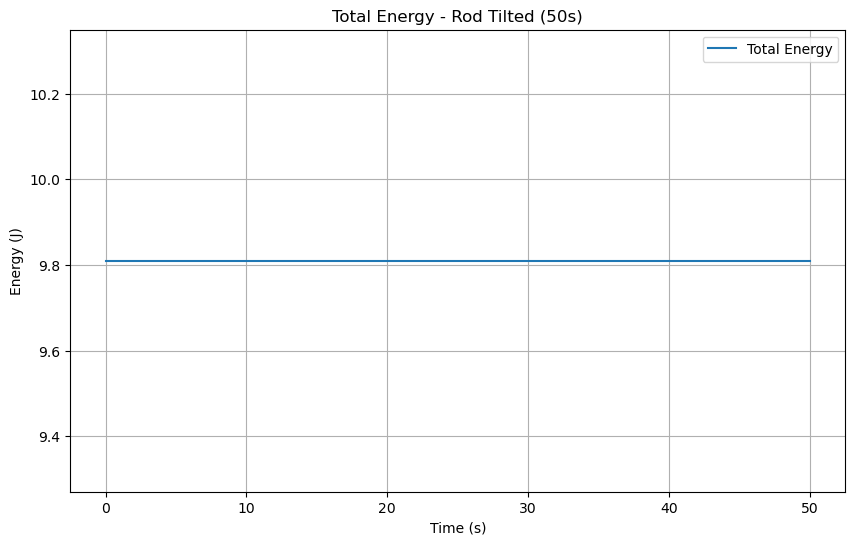

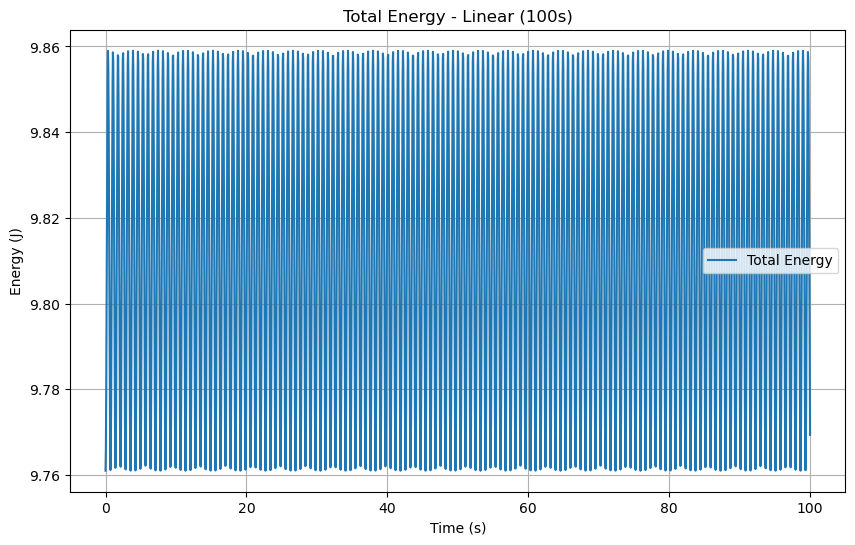

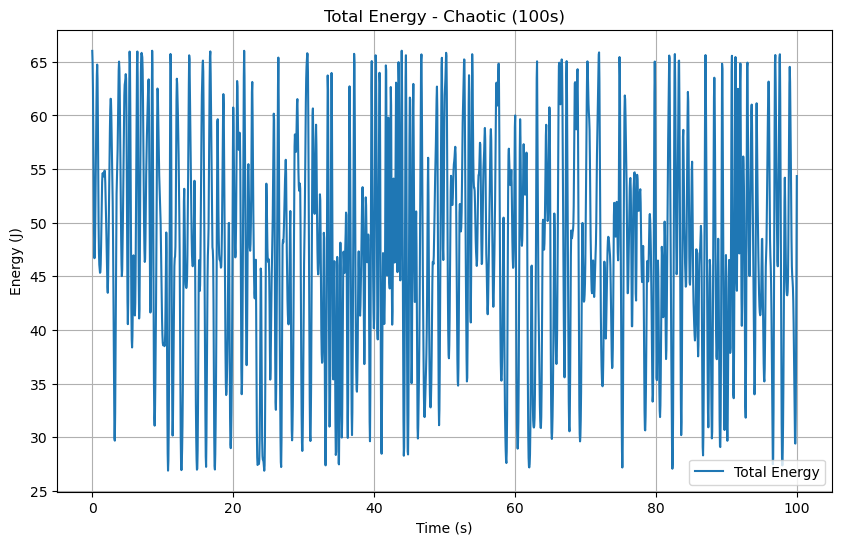

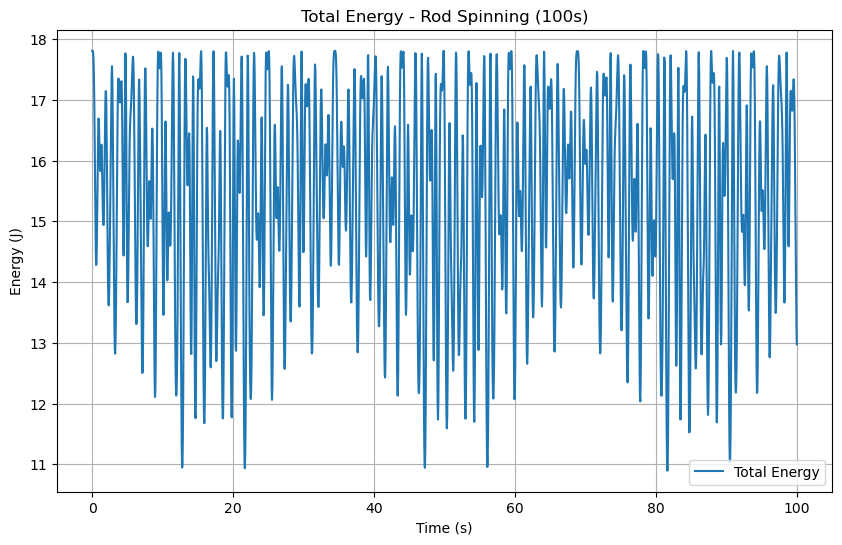

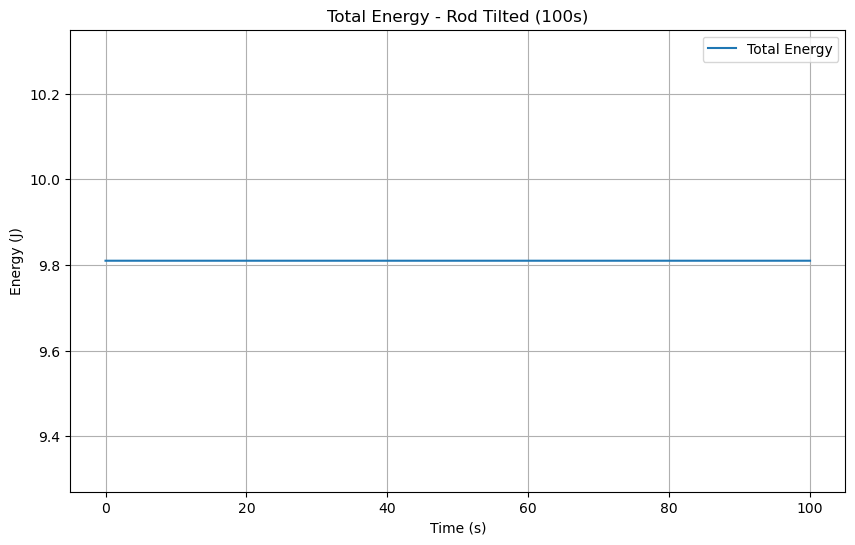

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#constants
m = 1.0
L = 1.0
l = 0.5
g = 9.81

#RHS function (simlar as Task 3)
def rhs(y, t, L, l, g):
    theta, phi1, phi2, dtheta, dphi1, dphi2 = y
    s1 = np.sin(phi1 - theta)
    s2 = np.sin(phi2 - theta)
    c1 = np.cos(phi1 - theta)
    c2 = np.cos(phi2 - theta)
    M = np.array([[4*L, -l*s1, l*s2],
                  [-L*s1, l, 0],
                  [L*s2, 0, l]])
    b = np.array([l*c1*dphi1**2 - l*c2*dphi2**2,
                  -L*c1*dtheta**2 - g*np.sin(phi1),
                  L*c2*dtheta**2 - g*np.sin(phi2)])
    ddtheta, ddphi1, ddphi2 = np.linalg.solve(M, b)
    return [dtheta, dphi1, dphi2, ddtheta, ddphi1, ddphi2]

#initial conditions (same as Task 3)
initial_conditions = [
    [0.1, 0.1, 0.1, 0, 0, 0],
    [0.1, 0.1, 0.1, 5, 5, 5],
    [0, 0, 0, 2, 0, 0],
    [np.pi/4, 0, 0, 0, 0, 0]
]
labels = ["Linear", "Chaotic", "Rod Spinning", "Rod Tilted"]

#position and velocity functions
def get_positions(y, L, l):
    theta, phi1, phi2 = y[0], y[1], y[2]
    r1 = [-L * np.cos(theta), -L * np.sin(theta)]
    r2 = [L * np.cos(theta), L * np.sin(theta)]
    r3 = [r1[0] + l * np.sin(phi1), r1[1] - l * np.cos(phi1)]
    r4 = [r2[0] + l * np.sin(phi2), r2[1] - l * np.cos(phi2)]
    return np.array([r1, r2, r3, r4])

def get_velocities(y, L, l):
    theta, phi1, phi2, dtheta, dphi1, dphi2 = y
    v1 = [L * np.sin(theta) * dtheta, -L * np.cos(theta) * dtheta]
    v2 = [-L * np.sin(theta) * dtheta, L * np.cos(theta) * dtheta]
    v3 = [v1[0] + l * np.cos(phi1) * dphi1, v1[1] + l * np.sin(phi1) * dphi1]
    v4 = [v2[0] + l * np.cos(phi2) * dphi2, v2[1] + l * np.sin(phi2) * dphi2]
    return np.array([v1, v2, v3, v4])

#Energy functions
def compute_T(y, m, L, l):
    velocities = get_velocities(y, L, l)
    return 0.5 * m * np.sum(velocities**2)

def compute_V(y, m, g, L, l):
    positions = get_positions(y, L, l)
    return -m * g * np.sum(positions[:, 1])

def compute_E(y, m, L, l, g):
    return compute_T(y, m, L, l) + compute_V(y, m, g, L, l)

#time arrays
t = np.linspace(0, 50, 1000)
t_long = np.linspace(0, 100, 2000)

#solving ODE
solutions = [odeint(rhs, y0, t, args=(L, l, g)) for y0 in initial_conditions]
solutions_long = [odeint(rhs, y0, t_long, args=(L, l, g)) for y0 in initial_conditions]

#ploting energy for 50s and 100s
for i, sol in enumerate(solutions):
    E = [compute_E(y, m, L, l, g) for y in sol]
    plt.figure(figsize=(10, 6))
    plt.plot(t, E, label='Total Energy')
    plt.title(f'Total Energy - {labels[i]} (50s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (J)')
    plt.grid(True)
    plt.legend()
    plt.show()

for i, sol in enumerate(solutions_long):
    E = [compute_E(y, m, L, l, g) for y in sol]
    plt.figure(figsize=(10, 6))
    plt.plot(t_long, E, label='Total Energy')
    plt.title(f'Total Energy - {labels[i]} (100s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (J)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Task 5 : Energies of rod & pendulum

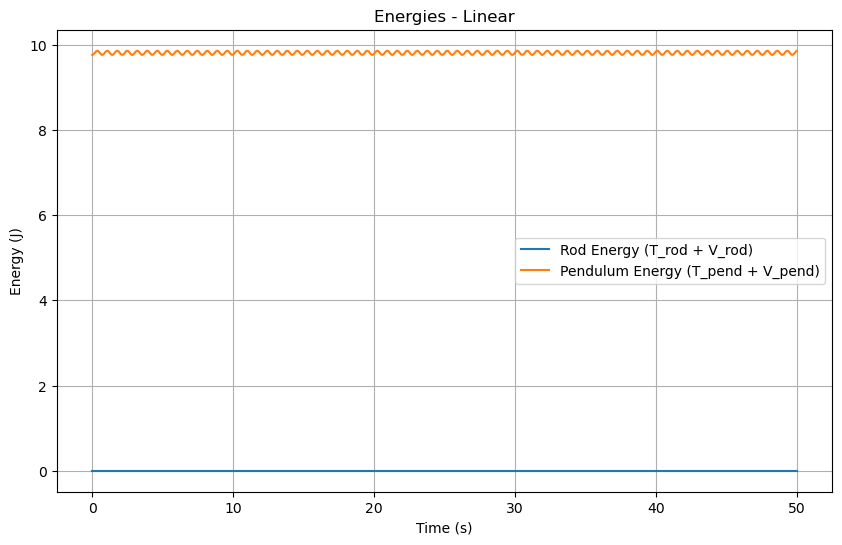

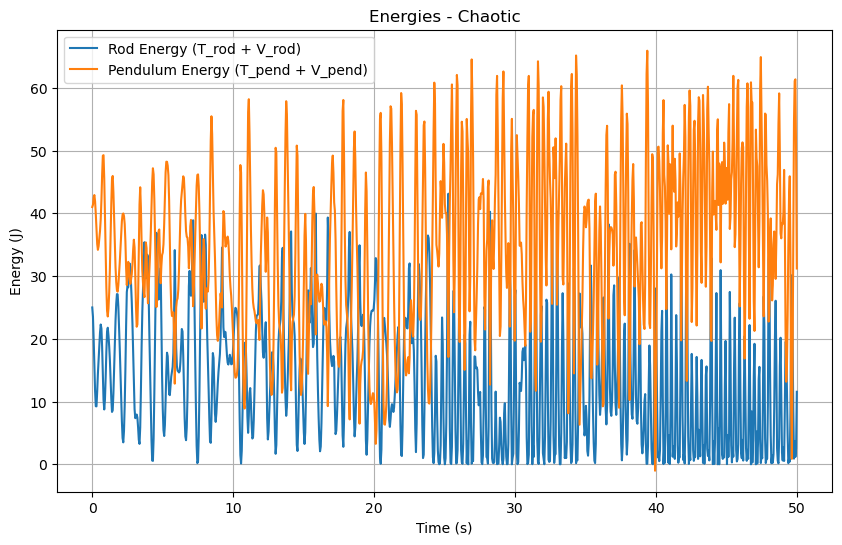

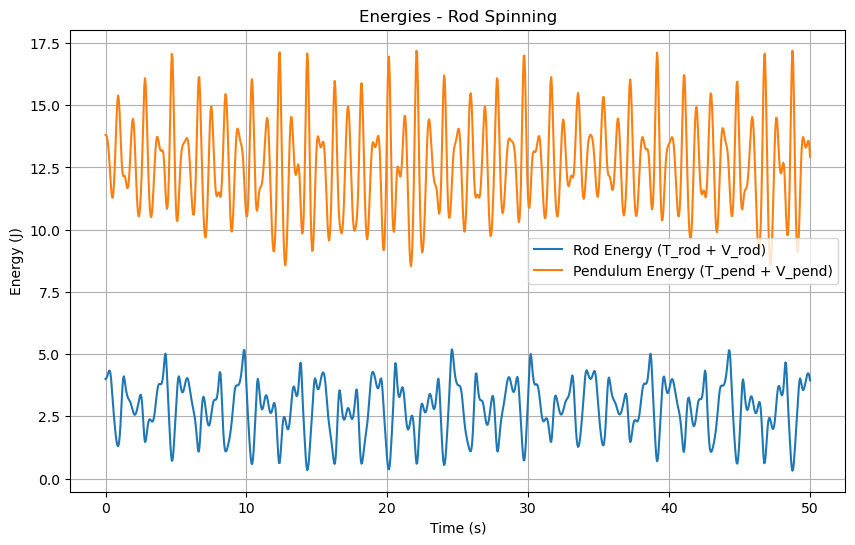

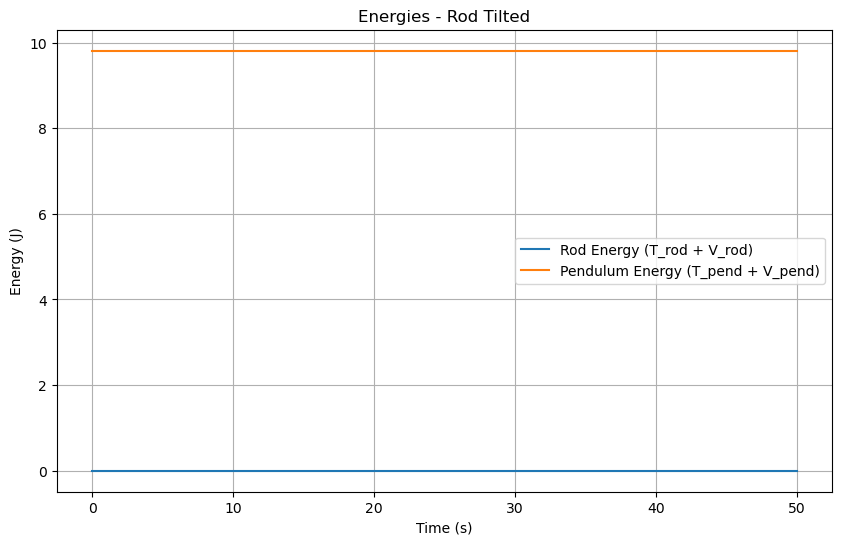

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#constants
m = 1.0
L = 1.0
l = 0.5
g = 9.81

#RHS function (same as in Task 3)
def rhs(y, t, L, l, g):
    theta, phi1, phi2, dtheta, dphi1, dphi2 = y
    s1 = np.sin(phi1 - theta)
    s2 = np.sin(phi2 - theta)
    c1 = np.cos(phi1 - theta)
    c2 = np.cos(phi2 - theta)
    M = np.array([[4*L, -l*s1, l*s2],
                  [-L*s1, l, 0],
                  [L*s2, 0, l]])
    b = np.array([l*c1*dphi1**2 - l*c2*dphi2**2,
                  -L*c1*dtheta**2 - g*np.sin(phi1),
                  L*c2*dtheta**2 - g*np.sin(phi2)])
    ddtheta, ddphi1, ddphi2 = np.linalg.solve(M, b)
    return [dtheta, dphi1, dphi2, ddtheta, ddphi1, ddphi2]

#initial conditions (similar as in Task 3)
initial_conditions = [
    [0.1, 0.1, 0.1, 0, 0, 0],
    [0.1, 0.1, 0.1, 5, 5, 5],
    [0, 0, 0, 2, 0, 0],
    [np.pi/4, 0, 0, 0, 0, 0]
]
labels = ["Linear", "Chaotic", "Rod Spinning", "Rod Tilted"]

#position and velocity functions (same as Task 4)
def get_positions(y, L, l):
    theta, phi1, phi2 = y[0], y[1], y[2]
    r1 = [-L * np.cos(theta), -L * np.sin(theta)]
    r2 = [L * np.cos(theta), L * np.sin(theta)]
    r3 = [r1[0] + l * np.sin(phi1), r1[1] - l * np.cos(phi1)]
    r4 = [r2[0] + l * np.sin(phi2), r2[1] - l * np.cos(phi2)]
    return np.array([r1, r2, r3, r4])

def get_velocities(y, L, l):
    theta, phi1, phi2, dtheta, dphi1, dphi2 = y
    v1 = [L * np.sin(theta) * dtheta, -L * np.cos(theta) * dtheta]
    v2 = [-L * np.sin(theta) * dtheta, L * np.cos(theta) * dtheta]
    v3 = [v1[0] + l * np.cos(phi1) * dphi1, v1[1] + l * np.sin(phi1) * dphi1]
    v4 = [v2[0] + l * np.cos(phi2) * dphi2, v2[1] + l * np.sin(phi2) * dphi2]
    return np.array([v1, v2, v3, v4])

#Time array
t = np.linspace(0, 50, 1000)

# solving ODE
solutions = [odeint(rhs, y0, t, args=(L, l, g)) for y0 in initial_conditions]

#compute and plot energies
for i, sol in enumerate(solutions):
    T_rod = [0.5 * m * (np.sum(get_velocities(y, L, l)[0]**2) + np.sum(get_velocities(y, L, l)[1]**2)) for y in sol]
    V_rod = [-m * g * (get_positions(y, L, l)[0, 1] + get_positions(y, L, l)[1, 1]) for y in sol]
    T_pend = [0.5 * m * (np.sum(get_velocities(y, L, l)[2]**2) + np.sum(get_velocities(y, L, l)[3]**2)) for y in sol]
    V_pend = [-m * g * (get_positions(y, L, l)[2, 1] + get_positions(y, L, l)[3, 1]) for y in sol]
    E_rod = [T_rod[j] + V_rod[j] for j in range(len(T_rod))]
    E_pend = [T_pend[j] + V_pend[j] for j in range(len(T_pend))]
    
    plt.figure(figsize=(10, 6))
    plt.plot(t, E_rod, label='Rod Energy (T_rod + V_rod)')
    plt.plot(t, E_pend, label='Pendulum Energy (T_pend + V_pend)')
    plt.title(f'Energies - {labels[i]}')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (J)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Task 6: Animations 

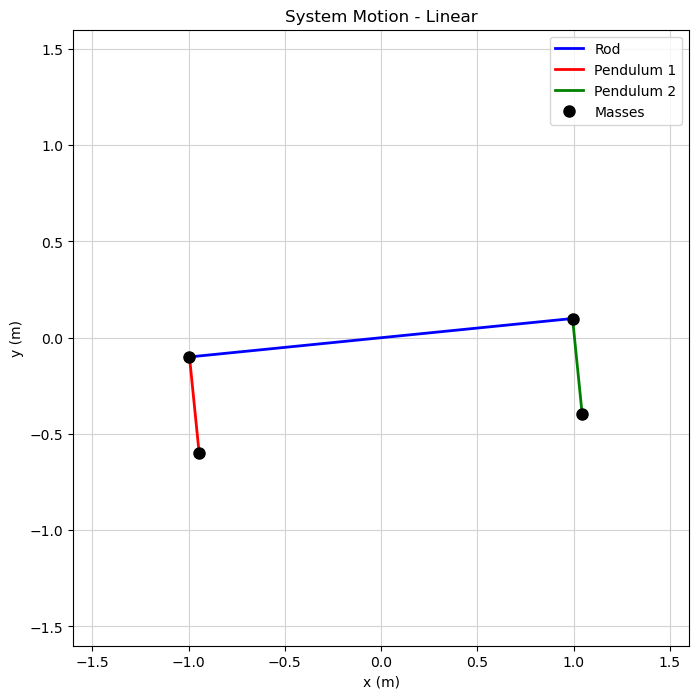

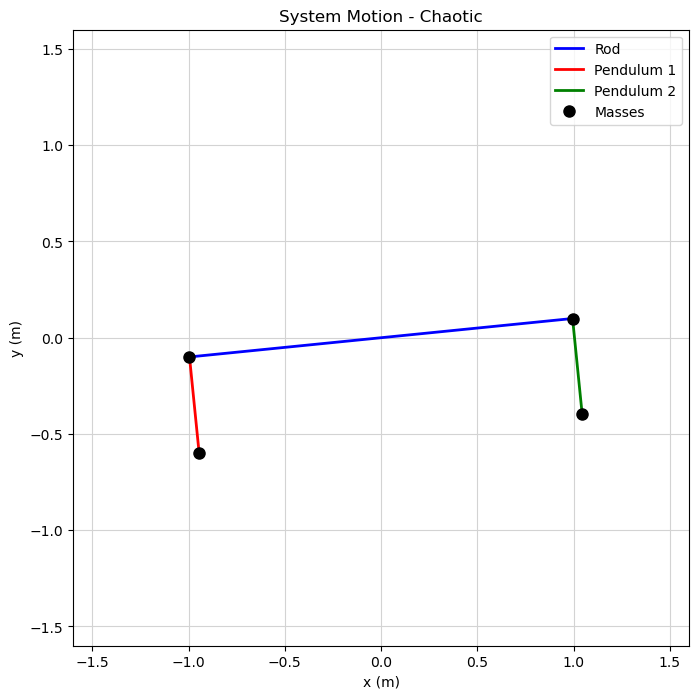

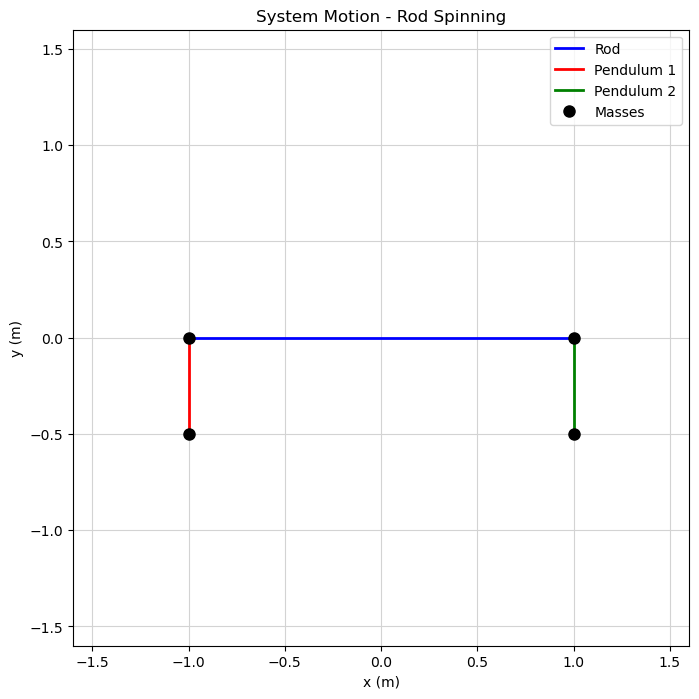

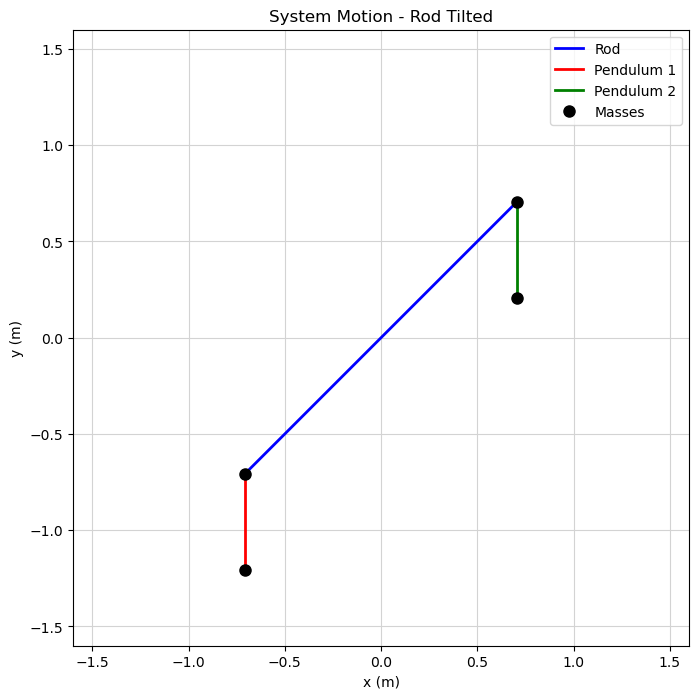

In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#constants
m = 1.0
L = 1.0
l = 0.5
g = 9.81

#RHS function for the rod-pendulum system
def rhs(y, t, L, l, g):
    theta, phi1, phi2, dtheta, dphi1, dphi2 = y
    s1 = np.sin(phi1 - theta)
    s2 = np.sin(phi2 - theta)
    c1 = np.cos(phi1 - theta)
    c2 = np.cos(phi2 - theta)
    M = np.array([[4*L, -l*s1, l*s2],
                  [-L*s1, l, 0],
                  [L*s2, 0, l]])
    b = np.array([l*c1*dphi1**2 - l*c2*dphi2**2,
                  -L*c1*dtheta**2 - g*np.sin(phi1),
                  L*c2*dtheta**2 - g*np.sin(phi2)])
    ddtheta, ddphi1, ddphi2 = np.linalg.solve(M, b)
    return [dtheta, dphi1, dphi2, ddtheta, ddphi1, ddphi2]

#Initial conditions
initial_conditions = [
    [0.1, 0.1, 0.1, 0, 0, 0],  # Linear
    [0.1, 0.1, 0.1, 5, 5, 5],  # Chaotic
    [0, 0, 0, 2, 0, 0],        # Rod Spinning
    [np.pi/4, 0, 0, 0, 0, 0]   # Rod Tilted
]
labels = ["Linear", "Chaotic", "Rod Spinning", "Rod Tilted"]

#Position function
def get_positions(y, L, l):
    theta, phi1, phi2 = y[0], y[1], y[2]
    r1 = [-L * np.cos(theta), -L * np.sin(theta)]
    r2 = [L * np.cos(theta), L * np.sin(theta)]
    r3 = [r1[0] + l * np.sin(phi1), r1[1] - l * np.cos(phi1)]
    r4 = [r2[0] + l * np.sin(phi2), r2[1] - l * np.cos(phi2)]
    return np.array([r1, r2, r3, r4])

#time array
t = np.linspace(0, 50, 1000)

#Solving ODE for each initial condition
solutions = [odeint(rhs, y0, t, args=(L, l, g)) for y0 in initial_conditions]

# Animations
for i, sol in enumerate(solutions):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-L - l - 0.1, L + l + 0.1)
    ax.set_ylim(-L - l - 0.1, L + l + 0.1)
    ax.set_aspect('equal')  # Ensure correct proportions
    ax.grid(True, color='lightgrey')  # Add light grey grid lines
    rod_line, = ax.plot([], [], 'b-', lw=2, label='Rod')
    pend1_line, = ax.plot([], [], 'r-', lw=2, label='Pendulum 1')
    pend2_line, = ax.plot([], [], 'g-', lw=2, label='Pendulum 2')
    masses = ax.plot([], [], 'ko', ms=8, label='Masses')[0]
    ax.legend()
    plt.title(f'System Motion - {labels[i]}')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')

    def update(frame):
        pos = get_positions(sol[frame], L, l)
        rod_line.set_data([pos[0, 0], pos[1, 0]], [pos[0, 1], pos[1, 1]])
        pend1_line.set_data([pos[0, 0], pos[2, 0]], [pos[0, 1], pos[2, 1]])
        pend2_line.set_data([pos[1, 0], pos[3, 0]], [pos[1, 1], pos[3, 1]])
        masses.set_data(pos[:, 0], pos[:, 1])
        return rod_line, pend1_line, pend2_line, masses

    ani = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    plt.show()

## Bonus: odeint vs. solve_ivp

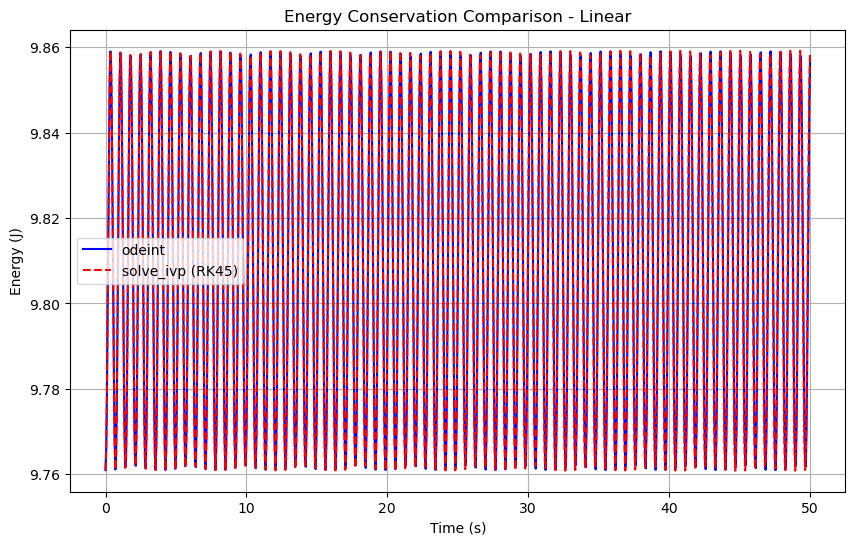

In [25]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

# constants
m = 1.0
L = 1.0
l = 0.5
g = 9.81

# RHS function (same as in Task 3)
def rhs(y, t, L, l, g):
    theta, phi1, phi2, dtheta, dphi1, dphi2 = y
    s1 = np.sin(phi1 - theta)
    s2 = np.sin(phi2 - theta)
    c1 = np.cos(phi1 - theta)
    c2 = np.cos(phi2 - theta)
    M = np.array([[4*L, -l*s1, l*s2],
                  [-L*s1, l, 0],
                  [L*s2, 0, l]])
    b = np.array([l*c1*dphi1**2 - l*c2*dphi2**2,
                  -L*c1*dtheta**2 - g*np.sin(phi1),
                  L*c2*dtheta**2 - g*np.sin(phi2)])
    ddtheta, ddphi1, ddphi2 = np.linalg.solve(M, b)
    return [dtheta, dphi1, dphi2, ddtheta, ddphi1, ddphi2]

#position and velocity functions (same as task 4)
def get_positions(y, L, l):
    theta, phi1, phi2 = y[0], y[1], y[2]
    r1 = [-L * np.cos(theta), -L * np.sin(theta)]
    r2 = [L * np.cos(theta), L * np.sin(theta)]
    r3 = [r1[0] + l * np.sin(phi1), r1[1] - l * np.cos(phi1)]
    r4 = [r2[0] + l * np.sin(phi2), r2[1] - l * np.cos(phi2)]
    return np.array([r1, r2, r3, r4])

def get_velocities(y, L, l):
    theta, phi1, phi2, dtheta, dphi1, dphi2 = y
    v1 = [L * np.sin(theta) * dtheta, -L * np.cos(theta) * dtheta]
    v2 = [-L * np.sin(theta) * dtheta, L * np.cos(theta) * dtheta]
    v3 = [v1[0] + l * np.cos(phi1) * dphi1, v1[1] + l * np.sin(phi1) * dphi1]
    v4 = [v2[0] + l * np.cos(phi2) * dphi2, v2[1] + l * np.sin(phi2) * dphi2]
    return np.array([v1, v2, v3, v4])

# Energy functions (same as task 4)
def compute_T(y, m, L, l):
    velocities = get_velocities(y, L, l)
    return 0.5 * m * np.sum(velocities**2)

def compute_V(y, m, g, L, l):
    positions = get_positions(y, L, l)
    return -m * g * np.sum(positions[:, 1])

def compute_E(y, m, L, l, g):
    return compute_T(y, m, L, l) + compute_V(y, m, g, L, l)

#Time array
t = np.linspace(0, 50, 1000)

#initial condition (Linear case)
y0 = [0.1, 0.1, 0.1, 0, 0, 0]

#Solving with odeint
sol_odeint = odeint(rhs, y0, t, args=(L, l, g))

#Solving with solve_ivp
sol_ivp = solve_ivp(lambda t, y: rhs(y, t, L, l, g), [0, 50], y0, t_eval=t, method='RK45')

#computing energies
E_odeint = [compute_E(y, m, L, l, g) for y in sol_odeint]
E_ivp = [compute_E(y, m, L, l, g) for y in sol_ivp.y.T]

#Ploting comparison
plt.figure(figsize=(10, 6))
plt.plot(t, E_odeint, 'b-', label='odeint')
plt.plot(t, E_ivp, 'r--', label='solve_ivp (RK45)')
plt.title('Energy Conservation Comparison - Linear')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()
plt.grid(True)
plt.show()

## Observation: 
The fact that the curve trajectories overlap suggests that both odeint and solve_ivp are accurately solving the ODE system. This is a critical result because it confirms that, for the system we’re analyzing, either solver can be used effectively to obtain reliable solutions. The overlapping lines indicate that the numerical solutions are consistent with each other, which is a good sign of their correctness and stability.